# PIP (Point-In-Polygon) 쿼리

---

&emsp;점(point)이 영역 내부 또는 외부에 있는지, 또는 선(line)이 다른 선 또는 다각형과 교차(intersect)하는지 판단하는 PIP (Point-In-Polygon) 쿼리는 다양한 공간 연산 중 빈번하게 사용됩니다. 특히 두 개의 공간 데이터셋 간의 공간 조인(spatial join)은 PIP 쿼리를 응용한 대표적인 사례입니다.

> **※ 참고**  
> 
> &emsp;PIP 및 도형 연산(geometric operation)에 대한 자세한 내용은 Smith, Goodchild & Longley가 집필한 [Geospatial Analysis 6판](https://www.spatialanalysisonline.com/HTML/index.html)의 4.2장에 정리되어 있습니다.  

## 레이 캐스팅 알고리즘 (Ray Casting Algorithm)

&emsp;점이 다각형 내부에 위치하는지 계산하기 위해 사용되는 알고리즘 중 대표적으로 [레이 캐스팅 알고리즘(Ray Casting Algorithm)](https://en.wikipedia.org/wiki/Point_in_polygon#Ray_casting_algorithm)이 있습니다. 이 알고리즘을 구현하기 위해 직접 함수를 만들지 않아도, [Shapely 라이브러리](https://shapely.readthedocs.io/en/stable/manual.html#binary-predicates)를 사용하여 PIP 쿼리 외에도 기하학적 개체들 간의 다양한 연산을 수행할 수 있습니다.  

## Shapely에서 PIP 쿼리 사용하기

&emsp;Shapely에서 PIP를 수행하는 두 가지 방법이 있습니다:  

1. 점이 다각형 내부에 있는지 확인하는 [within()](https://shapely.readthedocs.io/en/stable/manual.html#object.within) 함수를 사용  
2. 다각형이 점을 포함하고 있는지 확인하는 [contains()](https://shapely.readthedocs.io/en/stable/manual.html#object.contains) 함수를 사용

```{note}
&emsp;여기에서는 PIP 쿼리에 대해서만 다루고 있지만, Shapely의 LineString 또는 다각형(Polygon) 개체가 다른 다각형(Polygon) 내부에 있는지 확인하는 것도 동일한 방법으로 가능합니다.
```

&emsp;먼저 두 개의 점 개체 `point1`와 `point2`를 만들어줍니다. 그리고 다각형 개체 `polygon`도 생성합니다.

In [1]:
import shapely.geometry as geom

# 점 개체 생성
point1 = geom.Point(24.952242, 60.1696017)
point2 = geom.Point(24.976567, 60.1612500)

# 다각형 개체 생성
polygon = geom.Polygon([(24.950899, 60.169158),
                        (24.953492, 60.169158),
                        (24.953510, 60.170104),
                        (24.950958, 60.169990)
                       ])

print(point1)
print(point2)
print(polygon)

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


&emsp;두 점이 다각형 내부에 있는지 `within()` 함수를 사용하여 확인해 보겠습니다.

In [2]:
point1.within(polygon)

True

In [3]:
point2.within(polygon)

False

&emsp;첫 번째 점 `point1`은 다각형 내부(`True`)에 있지만, 두 번째 점 `point2`는 다각형 외부(`False`)에 있습니다. 이번에는 점이 다각형 내부에 있는지 확인하는 대신, 반대로 다각형이 점을 포함하는지 여부를 `contains()` 함수를 사용하여 확인해 보겠습니다.  

In [4]:
polygon.contains(point1)

True

In [5]:
polygon.contains(point2)

False

## Geopandas.GeoDataFrame에서 PIP 쿼리 사용하기

&emsp;아래 예시는 지오코딩을 통해 얻은 주소 중 어느 지점이 서울의 특정 구역 내에 있는지 탐색합니다.

In [6]:
import pathlib
import geopandas as gpd

NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

city_districts = gpd.read_file(DATA_DIRECTORY / "LARD_ADM_SECT_SGG_서울" / "LARD_ADM_SECT_SGG_11.shp",
                               encoding="cp949"
                              )
city_districts.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,NaN,11740,125,"POLYGON ((971595.075 1952405.815, 971596.036 1..."
1,11710,송파구,NaN,11710,126,"POLYGON ((965821.957 1949386.153, 965816.737 1..."
2,11680,강남구,NaN,11680,127,"POLYGON ((959331.597 1948602.068, 959342.021 1..."
3,11650,서초구,NaN,11650,128,"POLYGON ((956982.039 1947144.037, 956982.518 1..."
4,11620,관악구,NaN,11620,129,"POLYGON ((949438.997 1944127.713, 949456.647 1..."


<Axes: >

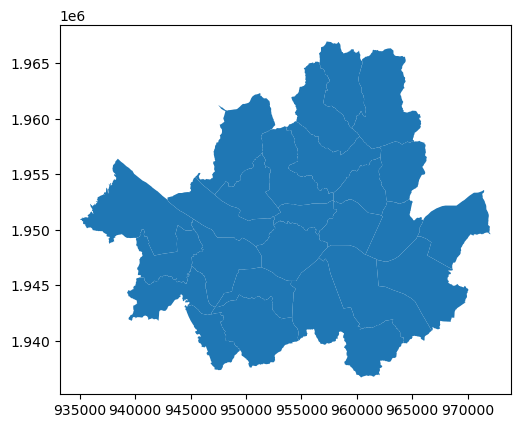

In [7]:
city_districts.plot()

In [8]:
city_districts.crs

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Korea, Republic of (South Korea)
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

&emsp;서울특별시 은평구 내에 있는 지점을 찾고자 합니다. 이 구역에 대한 별도의 데이터셋를 얻고, 주소 데이터를 로드하고, 은평구와 모든 지점을 하나의 지도에 표시하는 다중 레이어 맵을 시각화 해보겠습니다.

In [9]:
ep_district = city_districts[city_districts.SGG_NM == "은평구"]
ep_district

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
13,11380,은평구,NaN,11380,138,"POLYGON ((951637.438 1961851.784, 951649.915 1..."


In [10]:
addresses = gpd.read_file(DATA_DIRECTORY / "addresses.gpkg")
addresses

,address,지점,지점주소,geometry
0,"서울특별시아동학대예방센터, 광평로34길, 06352, 광평로34길, 서울, 대한민국",400,서울특별시 강남구 일원동 580,POINT (127.08775 37.47971)
1,"서울특별시데이터센터, 남부순환로340길, 06724, 남부순환로340길, 서울, 대한민국",401,서울특별시 서초구 서초동 1416번지,POINT (127.02191 37.47954)
2,"서울특별시 동부기술교육원, 183, 고덕로, 05235, 고덕로, 고덕동, 대한민국",402,서울특별시 강동구 고덕로 183,POINT (127.14557 37.55604)
3,"롯데월드, 240, 올림픽로, 05554, 올림픽로, 잠실동, 대한민국",403,서울특별시 송파구 올림픽로 240,POINT (127.09824 37.51150)
4,"월드메르디앙 201동, 양천로1길, 07602, 양천로1길, 서울, 대한민국",404,서울특별시 강서구 양천로 201,POINT (126.81027 37.57468)
5,"405-298, 목동동로12길, 08005, 목동동로12길, 서울, 대한민국",405,서울특별시 양천구 목동동로 298,POINT (126.87355 37.52290)
6,"서울특별시립도봉도서관, 시루봉로, 01375, 시루봉로, 쌍문4동, 대한민국",406,서울특별시 도봉구 시루봉로 173,POINT (127.02772 37.65291)
7,NaN,407,서울특별시 노원구 공릉동 사서함 230-3호 사서함 77호,None
8,"서울시립대학교, 163, 서울시립대로, 02504, 서울시립대로, 서울특별시, 대한민국",408,서울특별시 동대문구 서울시립대로 163,POINT (127.05918 37.58302)
9,"32, 면목로84길, 02162, 면목로84길, 서울시 중랑구, 대한민국",409,서울특별시 중랑구 면목로57길 32,POINT (127.08852 37.59191)


In [11]:
addresses.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
addresses = addresses.to_crs({"init": "EPSG:5179"})

C:\Users\bkk11\miniconda3\envs\Python-SA-GIS\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<Axes: >

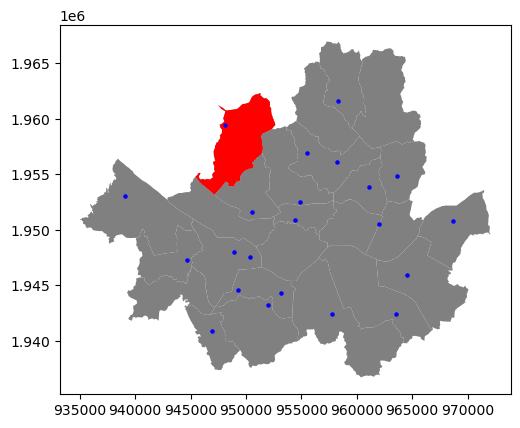

In [13]:
axes = city_districts.plot(facecolor="grey")
ep_district.plot(ax=axes, facecolor="red")
addresses.plot(ax=axes, color="blue", markersize=5)

&emsp;어떤 지점은 은평구 내에 있지만 그렇지 않은 지점들도 있습니다. 은평구 내부에 있는 항목을 찾기 위해, 이번에는 `geopandas.GeoDataFrame`에 대해 **PIP** 쿼리를 사용해 보겠습니다.  

In [16]:
in_ep_district = addresses.within(ep_district.at[13, "geometry"])
in_ep_district

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
dtype: bool

&emsp;마스크 배열(mask array)이라고도 하는 이 Boolean 리스트를 사용하여 주소 데이터프레임 `addresses`를 필터링할 수 있습니다.

In [17]:
addresses_in_ep_district = addresses[in_ep_district]
addresses_in_ep_district

,address,지점,지점주소,geometry
16,"서울특별시 소방학교, 통일로, 03312, 통일로, 진관동, 대한민국",416,서울특별시 은평구 진관동 산26,POINT (948102.071 1959409.520)


&emsp;마지막으로, 위 주소 목록을 시각화 해 해당 주소가 실제로 은평구 내에 있는지 시각적으로 확인하겠습니다.

<Axes: >

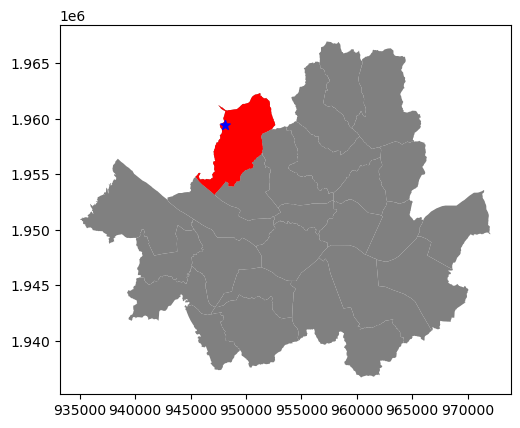

In [24]:
axes = city_districts.plot(facecolor="grey")
ep_district.plot(ax=axes, facecolor="red")

addresses_in_ep_district.plot(ax=axes, color="b", markersize=50, marker="*")

&emsp;완벽합니다! 실제로 서울 은평구(빨간색 다각형) 구역 안에 있는 해당 주소를 표시한 파란색 점만 남았습니다.

---

```{raw} html
<script src="https://utteranc.es/client.js"
        repo="Kwan-Gu/geospatial_analysis"
        issue-term="pathname"
        theme="preferred-color-scheme"
        crossorigin="anonymous"
        async>
</script>
```